# Chapter 7: Statistical arbitrage Trading	


### 7.1. Stationarity to Cointegration	
> ###### 7.1.1 Stationarity
> ###### 7.1.2 Cointegration

### 7.2. Pairs trading
> ###### 7.2.1 How it works
> ###### 7.2.2 Applications

Theoretically, making a long-term profit with a trading strategy is
impossible because the market should be equilibrium and efficient.
However, in reality, it is a little bit different. Indeed, there are many
unbalances in the financial market, and the statistical arbitrage
strategies make this disequilibrium in a profit. For example, one of
the most straightforward strategies is to find errors in the Forex
quotations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

### 7.1.1. Stationarity

The stationarity of a time series is essential because it is a crucial
point of the behavior of a time series.
There is stationarity if the time series is
flat around the mean and
without trend
. Moreover, it needs to have a
constant variance in
time
.

We can check the stationarity of a time series using the Dick and
Fuller test. The test's null hypothesis (H0) is that the time series is not
stationary. So, suppose we have a p-value inferior at error threshold s.
In that case, hypothesis H0 is not accepted, and it is a stationarity
time series. For example, if we want to know at an error threshold of
10% (if the time series is stationary), we will compute an augmented
Dick and Fuller test and check if the p-value is below or above 10%.
So, there are the following possibilities:


p > 0.10
: H0 is accepted, and the time series is not stationary.
We need to make some modifications if we want it to become
stationary.


p < 0.10
: H0 is not accepted, and the time series is stationary.
There are many tests to determine whether a time
series is stationary. However, be careful because all
tests have different null hypotheses, for one is
stationarity, and the other is non-stationarity.

The more the p-value is close to 0, the higher the
chance the time series is stationary.

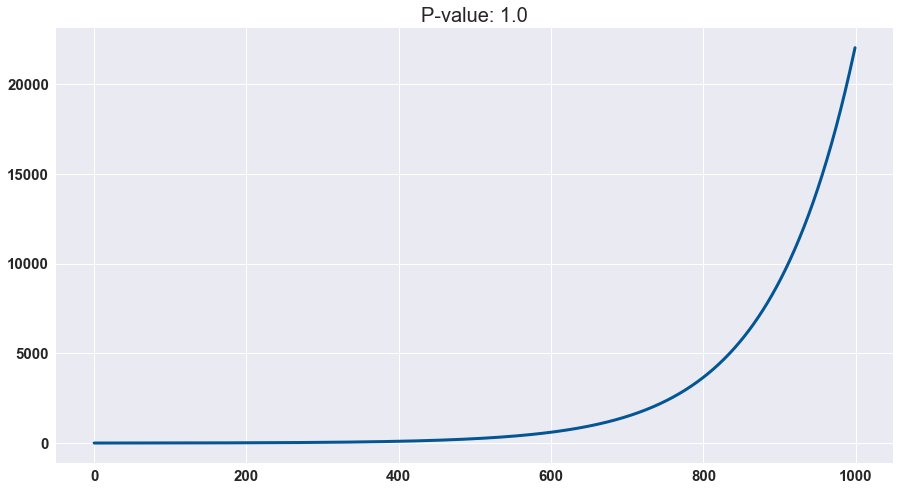

In [3]:
# Simulate time series
log = np.exp(np.linspace(1,10,1000))

# Compute the pvalue
p = adfuller(log)[1]


plt.figure(figsize=(15,8))
plt.plot(log, color="#035593", linewidth=3)
plt.title(f"P-value: {p}", size=20)
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.show()

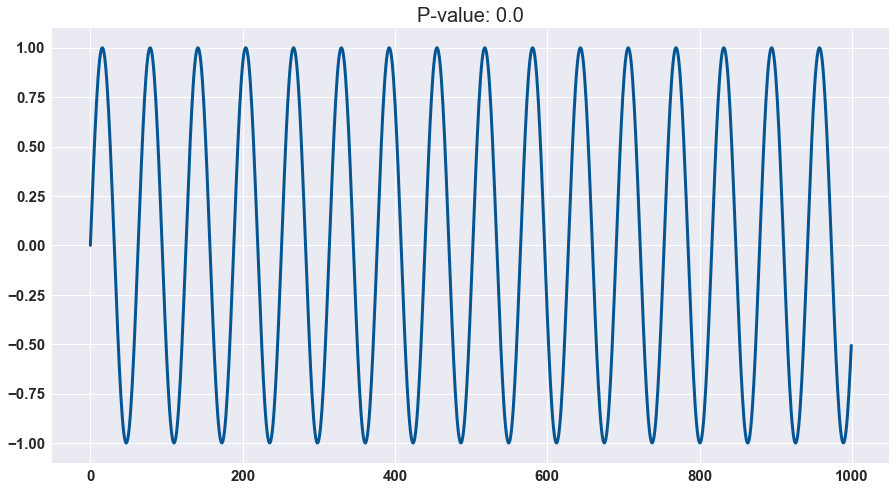

In [2]:
# Simulate time series
sin = np.sin(np.linspace(0,100,1000))

# Compute the pvalue
p = adfuller(sin)[1]


plt.figure(figsize=(15,8))
plt.plot(sin, color="#035593", linewidth=3)
plt.title(f"P-value: {p}", size=20)
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.show()


### 6.1.2. Cointegration

Many of the time, the stock prices are not stationary. So, how can we
apply models which need stationary data? To do it, we are going to
talk about cointegration.
The cointegration allows us to find a
stationary time series combining non-stationaries time
series.

So, to create a cointegration test, we need to compute linear
regression.

Figure 7.3 shows the difference between two cointegrated time series.
Indeed, in the figure, we can see the residual between both time
series. In this example, both the series are not stationary. Indeed, the
p-value for the augmented dick fuller test for the two times series
equals 1. Moreover, the p-value of the augmented dick and fuller test
for the residuals are 0.

In [4]:
# For cointegration check
import statsmodels.api as stat


def cointegration(x, y):
    p = 0.1
    px = adfuller(x)[1]
    py = adfuller(y)[1]
    ols = stat.OLS(x, y).fit()

    residual = adfuller(ols.resid)[1]
    if residual <= p and px > p and py > p:
        return 'Cointegration'
    else:
        return 'No Cointegration'

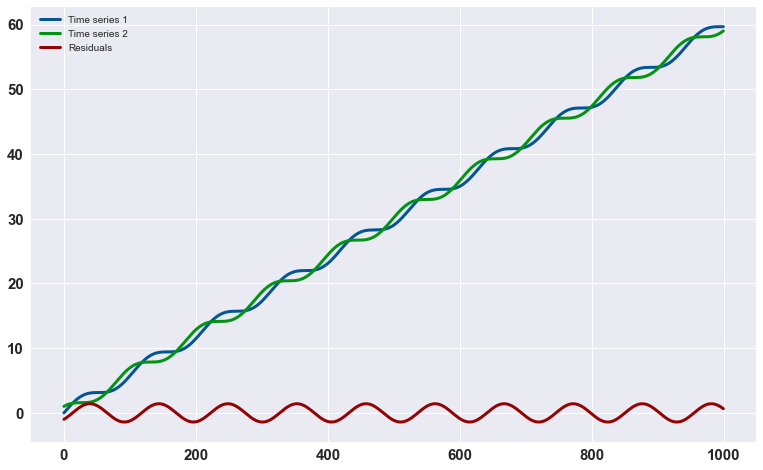

In [5]:
# Simulate the time series
numbers = np.linspace(0,60,1000)
sin = numbers + np.sin(numbers)
cos = numbers + np.cos(numbers)

plt.figure(figsize=(13,8))
plt.plot(sin, color="#035593", linewidth=3) # Ts1
plt.plot(cos, color="#039313", linewidth=3) # Ts2
plt.plot(sin-cos, color="#930303", linewidth=3) # Residuals
plt.legend(["Time series 1", "Time series 2", "Residuals"])
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.show()

### 6.1.2. How it works

We need to execute a qualitative analysis of the two pairs
:
we need assets of the same sector. For example, BTC/USD
and ETH/USD. Then, it is less critical, but we need to find
assets with similar market capitalization and equivalent daily
traded volumes.


We analyze if the time series are cointegrated
: this is the
essential part of the process. We need to have two nonstationary
time series with stationary residuals to find a linear
relationship between the two assets.


Analyze the correlation
: if we have a set of assets and too
many with cointegration, we can take the n best-correlated
asset (in returns).

Now that we have the z-score, we need to define the long and short
signals. There are many ways to do it. One of these ways is to enter
positions when we pass a standard deviation threshold and exit the
positions at the mean of the spread.


Figure 7.4 shows the spread of figure 7.3 with the standard deviation and
the mean of the values. The green circle represents a short position for
time series 1 and a long position for time series 2. Indeed, the spread is
ts1 minus ts2. We need a decrease of the time series 1 or an increase of
the time series 2, to return to the mean of the spread. The red circle
represents the inverse for the positions because the spread is negative.

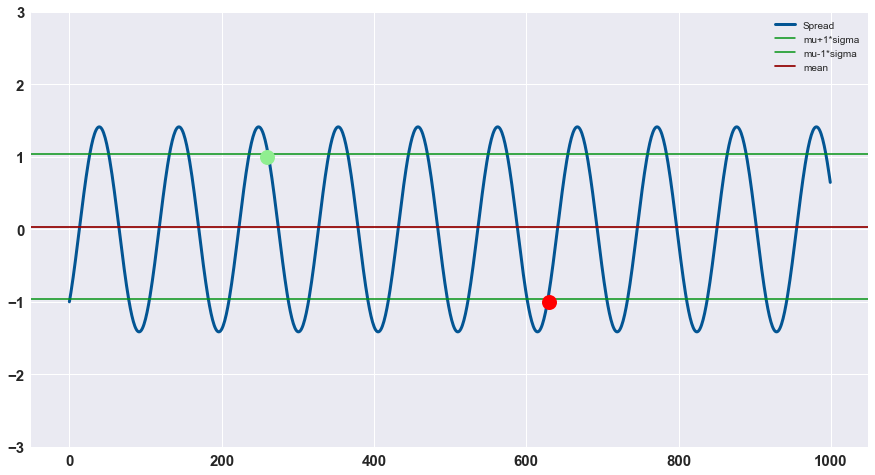

In [6]:
# Create the stars
ex_long = np.empty((len(sin),1))
ex_long[:] = np.NaN

ex_short = np.empty((len(sin),1))
ex_short[:] = np.NaN

ex_long[260] = 1
ex_short[630] = -1

# Plot the graph
plt.figure(figsize=(15,8))
plt.plot(sin-cos, color="#035593", linewidth=3)
plt.axhline((sin-cos).mean() + (sin-cos).std(), color="#039313", linewidth=1.5)
plt.axhline((sin-cos).mean() -(sin-cos).std(), color="#039313", linewidth=1.5)
plt.axhline((sin-cos).mean(), color="#930303")

plt.plot(ex_long, "o",markersize=15, color="lightgreen")
plt.plot(ex_short, "o",markersize=15, color="r")

plt.legend(["Spread", "mu+1*sigma", "mu-1*sigma", "mean"])
plt.ylim([-3,3])
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")


plt.show()

### 6.2.2. Pairs trading application

In [8]:
currencies = [f"{currency}=X" for currency in ["USDCAD",
            "EURUSD","EURCHF", "USDCHF","EURGBP", "NZDUSD","GBPCHF",
            "EURCAD","EURAUD","AUDNZD"]]

train_set = yf.download(currencies)["Adj Close"].dropna().loc["2000":"2017"]

[*********************100%***********************]  10 of 10 completed


In [9]:
# We need to find the number of combinaison of 2 by 10
# 10! / (2!*8!) = 45

# Initialize the variables
nbc = 0
list_com = []

while nbc <45:
    # Take the assetes for the pair randomly 
    c1 = np.random.choice(currencies)
    c2 = np.random.choice(currencies)

    # Add the list of the two asset
    if c1 != c2 and [c1, c2] not in list_com and [c2, c1] not in list_com:
        list_com.append([c1,c2])
        nbc+=1

list_com

[['EURCAD=X', 'EURGBP=X'],
 ['GBPCHF=X', 'AUDNZD=X'],
 ['EURCAD=X', 'USDCAD=X'],
 ['USDCHF=X', 'EURGBP=X'],
 ['EURUSD=X', 'EURCAD=X'],
 ['USDCHF=X', 'EURCHF=X'],
 ['USDCAD=X', 'EURCHF=X'],
 ['NZDUSD=X', 'GBPCHF=X'],
 ['USDCHF=X', 'NZDUSD=X'],
 ['EURCHF=X', 'AUDNZD=X'],
 ['EURCAD=X', 'GBPCHF=X'],
 ['USDCAD=X', 'EURGBP=X'],
 ['EURGBP=X', 'GBPCHF=X'],
 ['EURCAD=X', 'EURAUD=X'],
 ['EURCAD=X', 'AUDNZD=X'],
 ['NZDUSD=X', 'EURCAD=X'],
 ['EURAUD=X', 'EURUSD=X'],
 ['USDCHF=X', 'EURUSD=X'],
 ['EURGBP=X', 'AUDNZD=X'],
 ['AUDNZD=X', 'EURUSD=X'],
 ['GBPCHF=X', 'EURAUD=X'],
 ['USDCHF=X', 'EURCAD=X'],
 ['EURGBP=X', 'EURAUD=X'],
 ['EURCAD=X', 'EURCHF=X'],
 ['GBPCHF=X', 'USDCHF=X'],
 ['USDCAD=X', 'EURAUD=X'],
 ['EURAUD=X', 'AUDNZD=X'],
 ['NZDUSD=X', 'EURCHF=X'],
 ['USDCHF=X', 'AUDNZD=X'],
 ['USDCAD=X', 'AUDNZD=X'],
 ['USDCHF=X', 'USDCAD=X'],
 ['EURCHF=X', 'EURGBP=X'],
 ['EURGBP=X', 'NZDUSD=X'],
 ['USDCAD=X', 'GBPCHF=X'],
 ['EURUSD=X', 'NZDUSD=X'],
 ['EURAUD=X', 'EURCHF=X'],
 ['EURUSD=X', 'GBPCHF=X'],
 

In [10]:
# Initialize the storage variable for all row
resume = []

for com in list_com:
    # Initialize the variable
    row = []

    # Add the name of the assets in the list
    row.extend(com)

    # Add the result of the cointegration test
    row.append(cointegration(train_set[com[0]].values, train_set[com[1]].values))

    # Add the results of the correlation 
    row.append(train_set[com].pct_change(1).corr().values[0][1])

    # Add each row to do a list of list
    resume.append(row)

# Create a dataframe to a better visualization
sum = pd.DataFrame(resume,columns=["Asset1", "Asset2", "Cointegration", "Cor"])

# Filtered the row by the cointegred pair
sum.loc[sum["Cointegration"] == "Cointegration"]

,Asset1,Asset2,Cointegration,Cor
17,USDCHF=X,EURUSD=X,Cointegration,-0.548286
19,AUDNZD=X,EURUSD=X,Cointegration,-0.011086
43,AUDNZD=X,NZDUSD=X,Cointegration,-0.269290
44,USDCHF=X,EURAUD=X,Cointegration,-0.152206


In [12]:
# Reset train test sets
test_set = yf.download(currencies)["Adj Close"].dropna().loc["2017":]
train_set = yf.download(currencies)["Adj Close"].dropna().loc["2000":"2017"]

# Define the assets using the cointegration and correlation criterion
ts1 = "EURAUD=X"
ts2 = "USDCHF=X"

# Create the percentage of variation for each time series
test_set["pct ts1"] = test_set[ts1].pct_change(1)
test_set["pct ts2"] = test_set[ts2].pct_change(1)

# Compute the difference between the two time series
train_set["spread"] = train_set[ts1]-train_set[ts2]
test_set["spread"] = test_set[ts1]-test_set[ts2]

# Compute the z-scores
test_set["z-score"] = (test_set["spread"] - train_set["spread"].mean()) / train_set["spread"].std()
train_set["z-score"] = (train_set["spread"] - train_set["spread"].mean()) / train_set["spread"].std()

# Compute the mean and the std
std_high = train_set["z-score"].std()
std_low = train_set["z-score"].std()
mean = train_set["z-score"].mean()

# Create some variables
test_set["signal_ts1"] = np.nan
test_set["signal_ts2"] = np.nan
test_set["yersteday_z-score"] = test_set["z-score"].shift(1)


# Short
test_set.loc[(test_set["z-score"]<std_high) & (test_set["yersteday_z-score"]>std_high),"signal_ts1"] = -1

# False short signal
test_set.loc[(test_set["z-score"]>std_high) & (test_set["yersteday_z-score"]<std_high),"signal_ts1"] = 0

# Long
test_set.loc[(test_set["z-score"]>std_low) & (test_set["yersteday_z-score"]<std_low),"signal_ts1"] = 1

# False long signal
test_set.loc[(test_set["z-score"]<std_low) & (test_set["yersteday_z-score"]>std_low),"signal_ts1"] = 0

# Cut long position
test_set.loc[(test_set["z-score"]<mean) & (test_set["yersteday_z-score"]>mean),"signal_ts1"] = 0

# Cut short position
test_set.loc[(test_set["z-score"]>mean) & (test_set["yersteday_z-score"]<mean),"signal_ts1"] = 0

# positions
test_set["positions_ts1"] = test_set["signal_ts1"].fillna(method='ffill').fillna(0)



# long
test_set.loc[(test_set["z-score"]<std_high) & (test_set["yersteday_z-score"]>std_high),"signal_ts2"] = 1

# False long signal
test_set.loc[(test_set["z-score"]>std_high) & (test_set["yersteday_z-score"]<std_high),"signal_ts2"] = 0

# short
test_set.loc[(test_set["z-score"]>std_low) & (test_set["yersteday_z-score"]<std_low),"signal_ts2"] = -1

# False short signal
test_set.loc[(test_set["z-score"]<std_high) & (test_set["yersteday_z-score"]>std_high),"signal_ts2"] = 0

# Cut short position
test_set.loc[(test_set["z-score"]<mean) & (test_set["yersteday_z-score"]>mean),"signal_ts2"] = 0

# Cut long position
test_set.loc[(test_set["z-score"]>mean) & (test_set["yersteday_z-score"]<mean),"signal_ts2"] = 0

# positions
test_set["positions_ts2"] = test_set["signal_ts2"].fillna(method='ffill').fillna(0)

test_set["profit_ts1"] =  (test_set["positions_ts1"].shift(1)) * test_set["pct ts1"]
test_set["profit_ts2"] =  (test_set["positions_ts1"].shift(1)) * test_set["pct ts2"]

test_set["profit"] = test_set["profit_ts1"] + test_set["profit_ts2"]

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: -0.009 	 Alpha: -0.19 %	     Sharpe: -0.122 	 Sortino: -0.142
  -----------------------------------------------------------------------------
    VaR: 18.06 %	 cVaR: 20.59 % 	     VaR/cVaR: 1.141 	 drawdown: 25.08 %
  -----------------------------------------------------------------------------


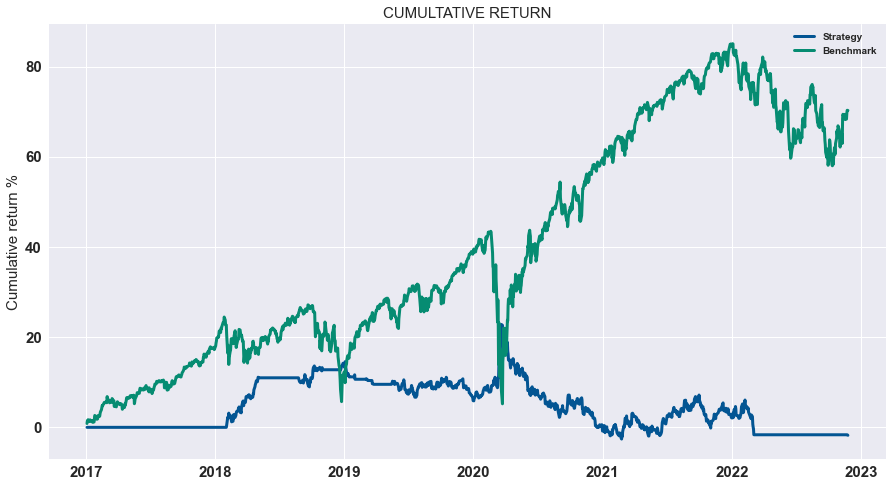

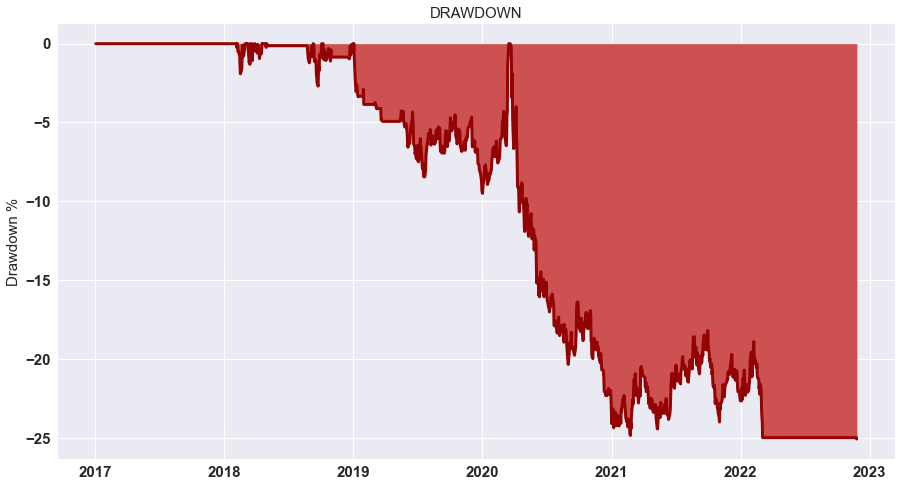

In [13]:
from Backtest import *
backtest_dynamic_portfolio(test_set["profit"])